In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


2022-06-02 01:27:32.950377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-02 01:27:32.950416: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train,y_train),(X_test, y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane", "automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

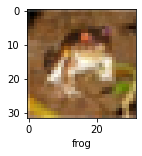

In [10]:
plot_sample(X_train, y_train, 0)

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
ann= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5) 

2022-06-02 01:09:47.446838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-02 01:09:47.447263: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-02 01:09:47.447950: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zestypratyush-HP-Laptop-14s-dk0xxx): /proc/driver/nvidia/version does not exist
2022-06-02 01:09:47.451604: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-02 01:09:47.990756: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Alloca

Epoch 1/5
1563/1563 [==============================] - 84s 53ms/step - loss: 2.3008 - accuracy: 0.1274
Epoch 2/5
1563/1563 [==============================] - 85s 54ms/step - loss: 2.2997 - accuracy: 0.1421
Epoch 3/5
1563/1563 [==============================] - 86s 55ms/step - loss: 2.2990 - accuracy: 0.1407
Epoch 4/5
1563/1563 [==============================] - 88s 56ms/step - loss: 2.2980 - accuracy: 0.1445
Epoch 5/5
1563/1563 [==============================] - 87s 55ms/step - loss: 2.2968 - accuracy: 0.1435


CNN Model

In [11]:
cnn= models.Sequential([
        #cnn
        layers.Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10) 

2022-06-02 01:27:56.210855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-02 01:27:56.210955: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-02 01:27:56.211006: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zestypratyush-HP-Laptop-14s-dk0xxx): /proc/driver/nvidia/version does not exist
2022-06-02 01:27:56.212233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8785 - accuracy: 0.4200
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2595 - accuracy: 0.5554
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1113 - accuracy: 0.6112
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0154 - accuracy: 0.6478
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9438 - accuracy: 0.6738
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8838 - accuracy: 0.6934
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8295 - accuracy: 0.7149
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7749 - accuracy: 0.7318
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7420 - accuracy: 0.7438
Epoch 10/10
1563/1563 [==============================] - 34s 21m

In [12]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0940 - accuracy: 0.6623


[1.0939818620681763, 0.6622999906539917]

In [13]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [14]:
y_test = y_test.reshape(-1,)

In [15]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

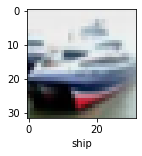

In [16]:
plot_sample(X_test,y_test,1)

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[2.5028908e-03, 8.5482199e-04, 5.2283285e-03, 7.3438865e-01,
        2.5711983e-02, 5.8268150e-03, 1.2770806e-01, 2.6741037e-03,
        9.2478298e-02, 2.6261371e-03],
       [3.6087583e-04, 6.2086176e-02, 5.7555658e-06, 4.4226496e-07,
        1.2561016e-07, 1.5774422e-07, 2.8459050e-07, 2.6532214e-09,
        9.3687803e-01, 6.6820957e-04],
       [2.4546953e-02, 5.6846976e-01, 3.0505564e-02, 5.4911650e-03,
        6.1624120e-03, 2.2258260e-03, 1.0647579e-02, 1.9120289e-03,
        1.8069132e-01, 1.6934739e-01],
       [8.1399959e-01, 4.4703647e-02, 5.3366771e-06, 7.4032387e-06,
        1.3981967e-01, 4.7779625e-04, 2.6942146e-06, 4.4365581e-05,
        7.7361189e-04, 1.6587783e-04],
       [1.2341476e-05, 9.1495485e-06, 7.1919365e-03, 1.2699487e-03,
        6.3253477e-02, 8.2995582e-05, 9.2808312e-01, 2.3345503e-05,
        6.2029474e-05, 1.1700509e-05]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
classes[y_classes[1]]

'ship'

In [23]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1000
           1       0.72      0.84      0.77      1000
           2       0.58      0.52      0.55      1000
           3       0.53      0.39      0.45      1000
           4       0.54      0.72      0.61      1000
           5       0.66      0.47      0.55      1000
           6       0.63      0.83      0.72      1000
           7       0.72      0.68      0.70      1000
           8       0.77      0.77      0.77      1000
           9       0.74      0.74      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

